Rows after filtering: 1338
Rows after filtering: 1329
Rows after filtering: 1191
  Variable         Mean     Median      Variance  Standard Deviation
0      Age    39.010915    39.0000  1.975890e+02           14.056634
1      BMI    29.993648    29.7000  3.446375e+01            5.870584
2  Charges  9901.104142  8347.1643  5.165843e+07         7187.379901


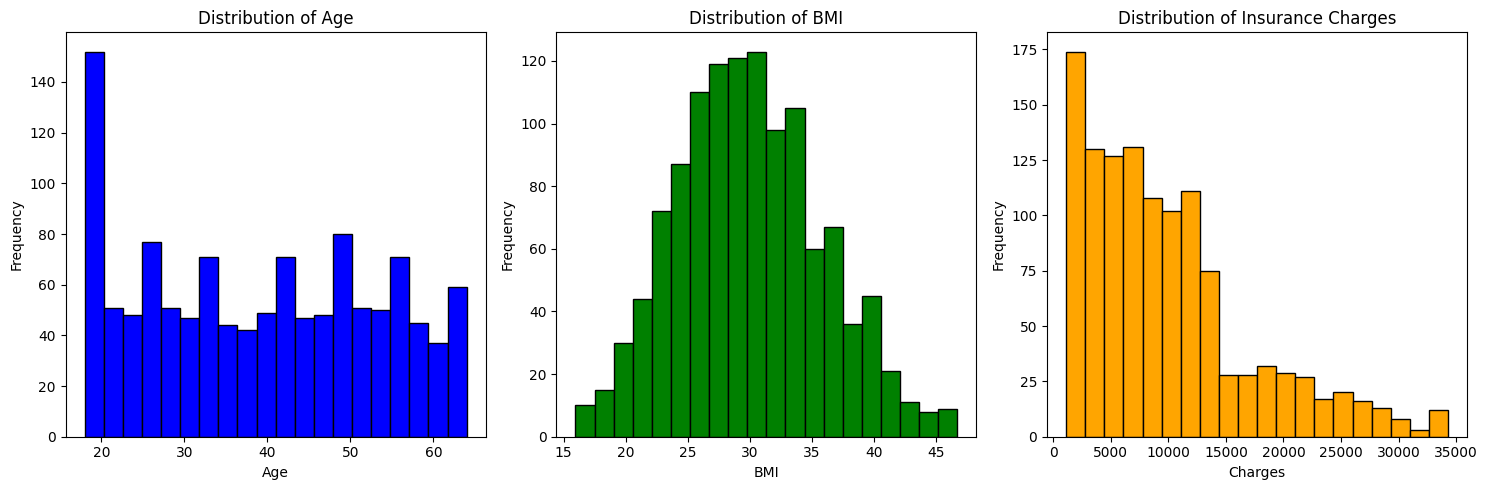

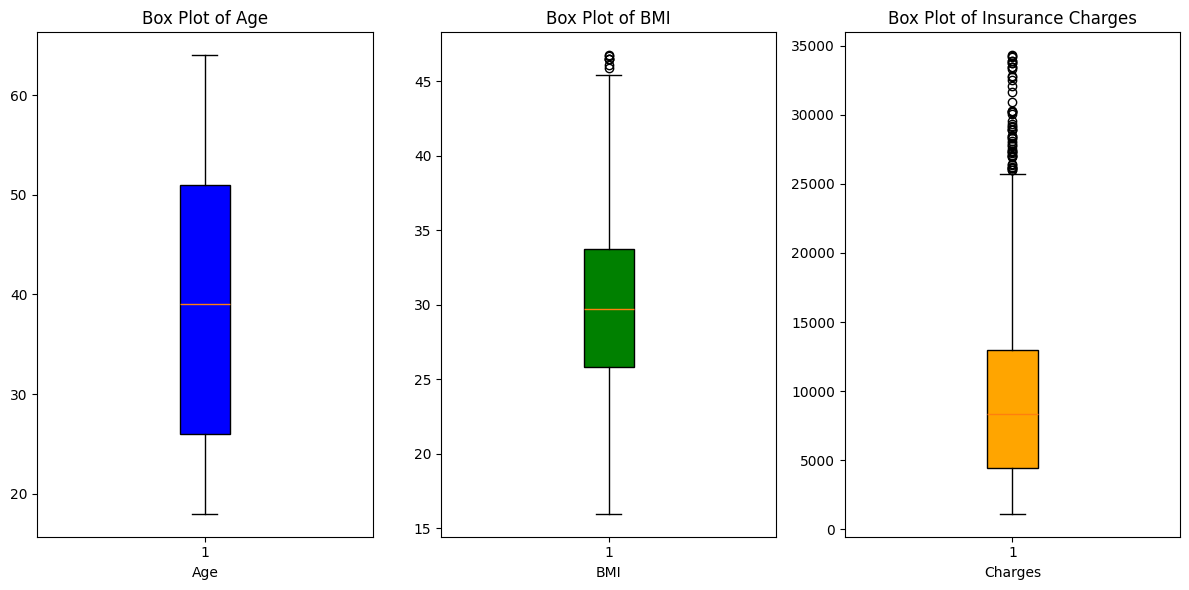

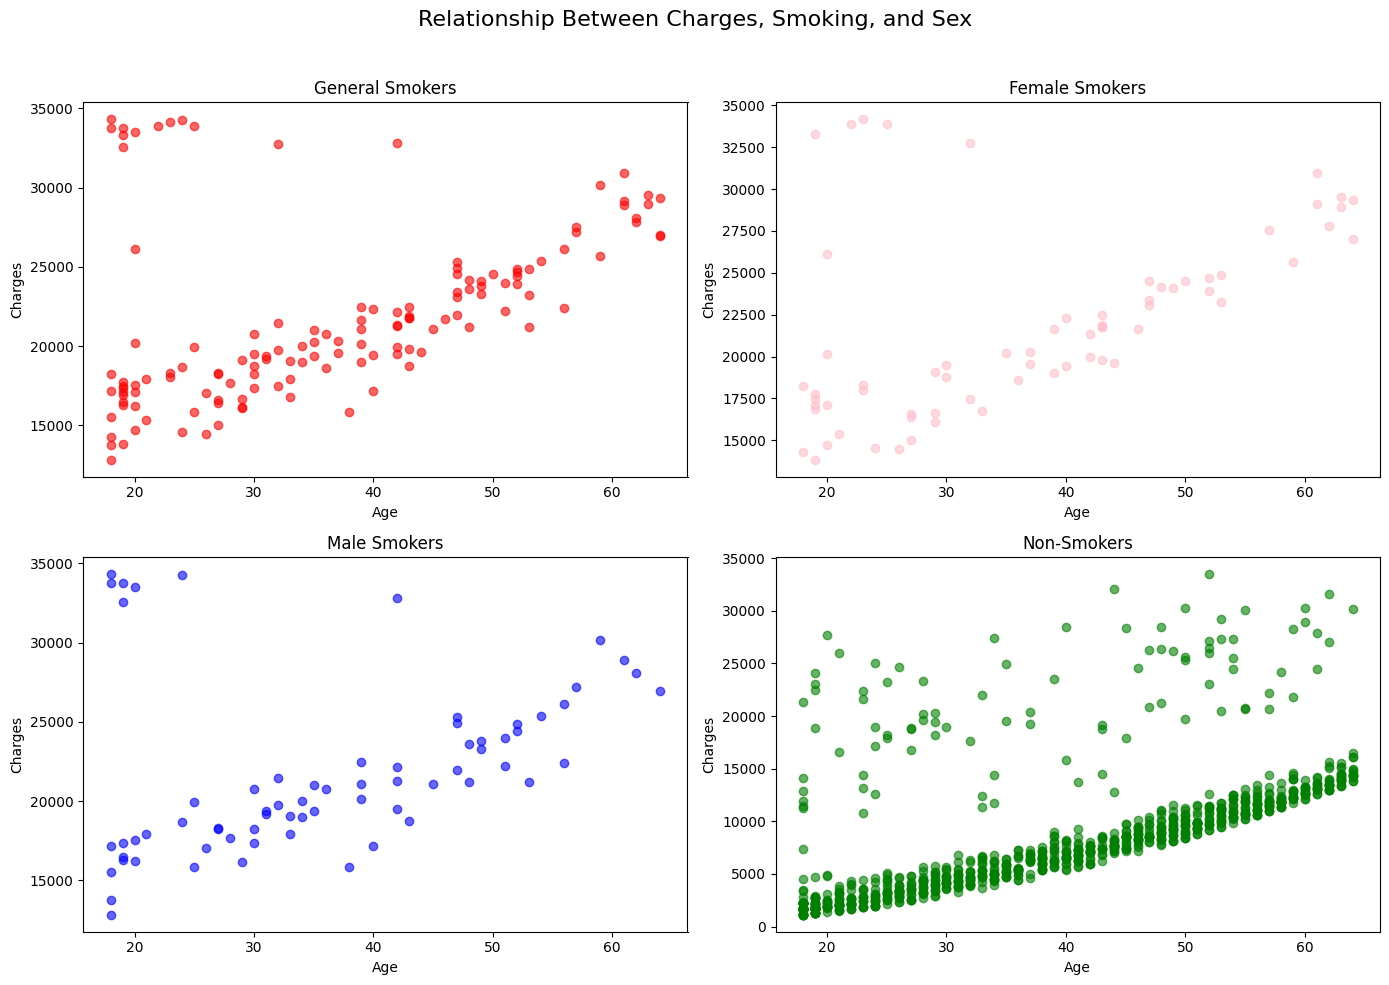

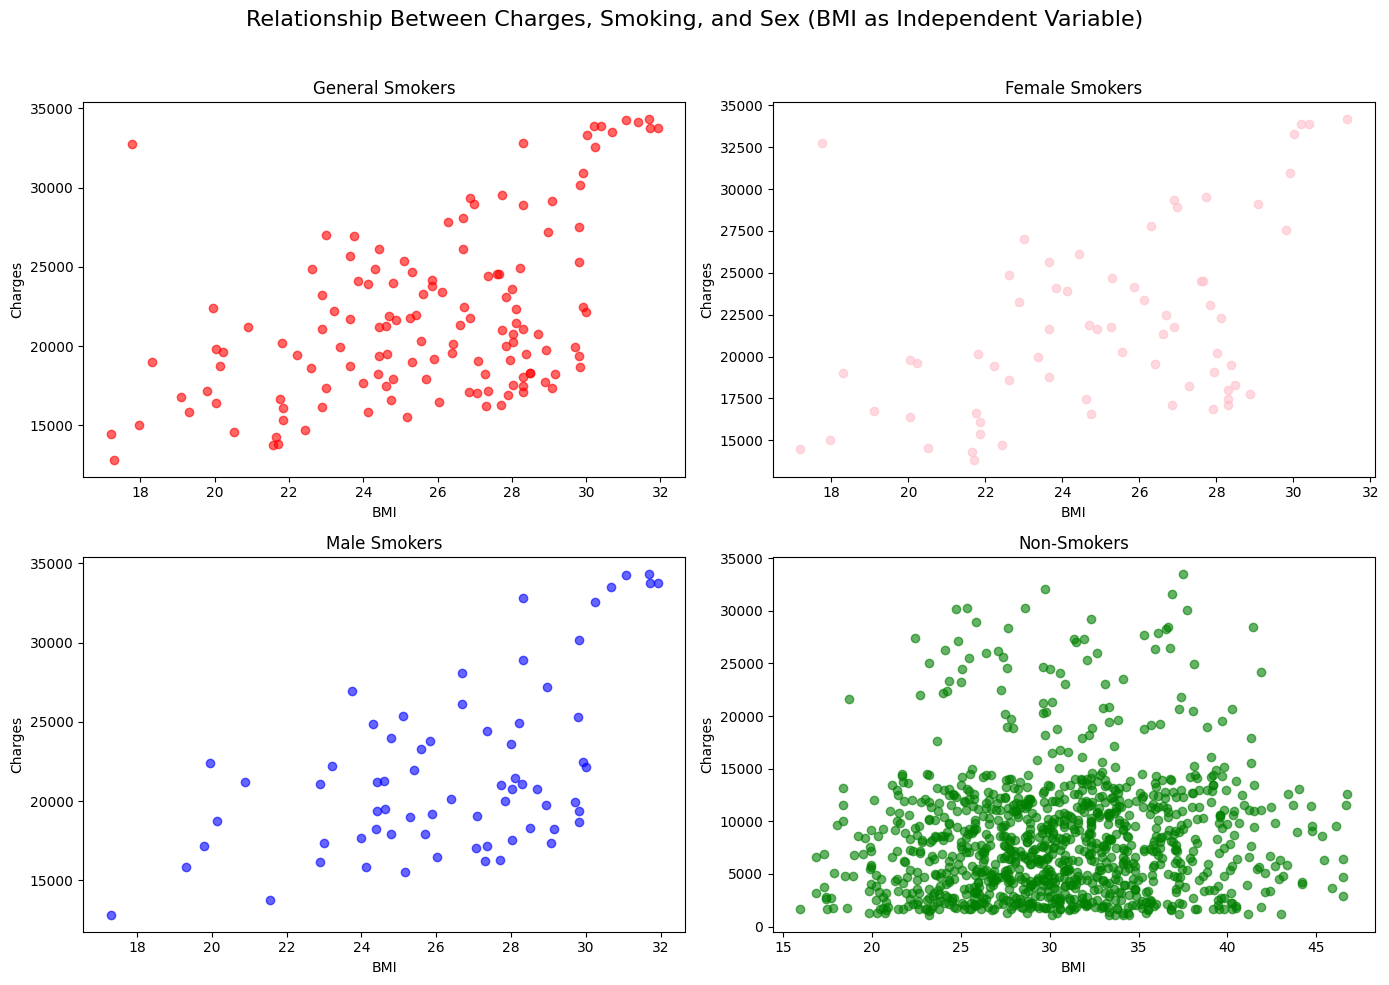

   age  sex       bmi  children  smoker  region   charges
0   19    0 -0.356634         0       1       1  9.734176
1   18    1  0.643267         1       0       0  7.453302
2   28    1  0.512104         3       0       0  8.400538
3   33    1 -1.241554         0       0       3  9.998092
4   32    1 -0.189700         0       0       3  8.260197
   age  sex       bmi  children  smoker  region   charges  risk_score  \
0   19    0 -0.356634         0       1       1  9.734176   -1.304514   
1   18    1  0.643267         1       0       0  7.453302   -1.494007   
2   28    1  0.512104         3       0       0  8.400538   -0.786523   
3   33    1 -1.241554         0       0       3  9.998092   -0.472766   
4   32    1 -0.189700         0       0       3  8.260197   -0.518910   

   smoker_age_interaction  family_size    bmi_age  
0                      19            1  -6.776041  
1                       0            2  11.578803  
2                       0            4  14.338923  
3    

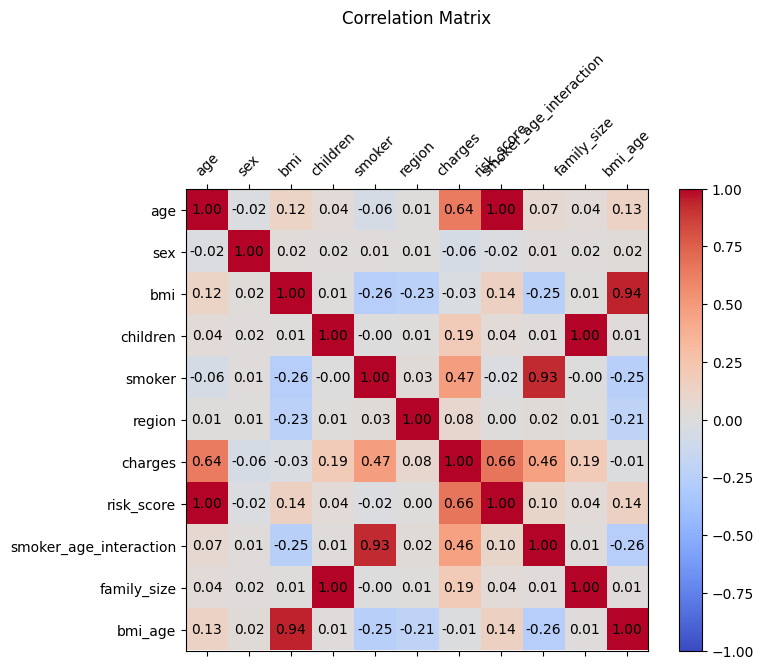

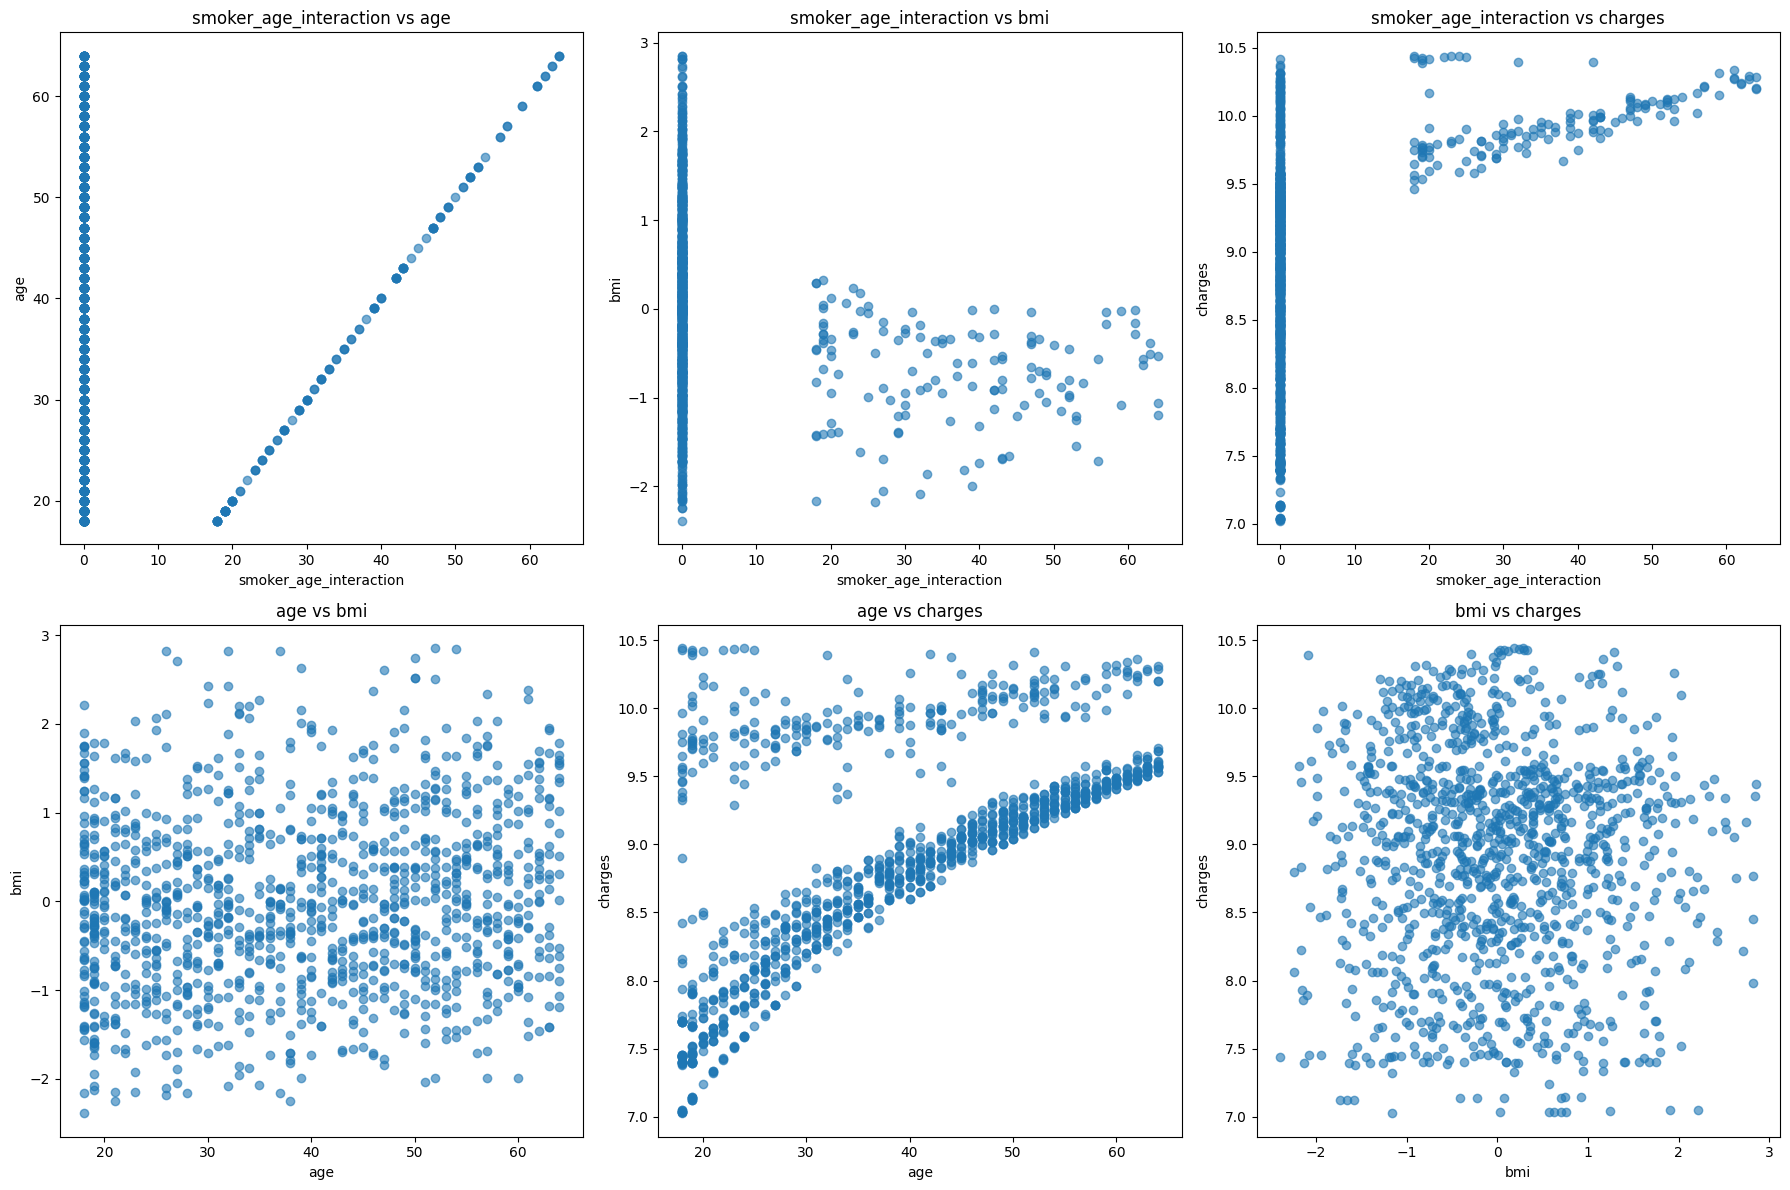

Converged after 680 iterations.
Coefficients: [8.902172936362255, 0.5253526747656493, -0.08939829912858145]


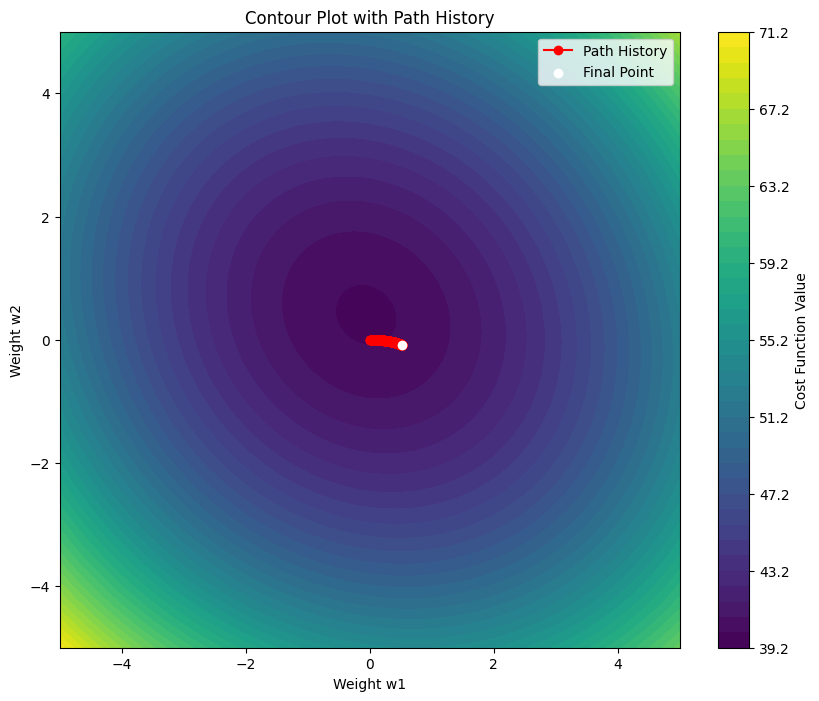

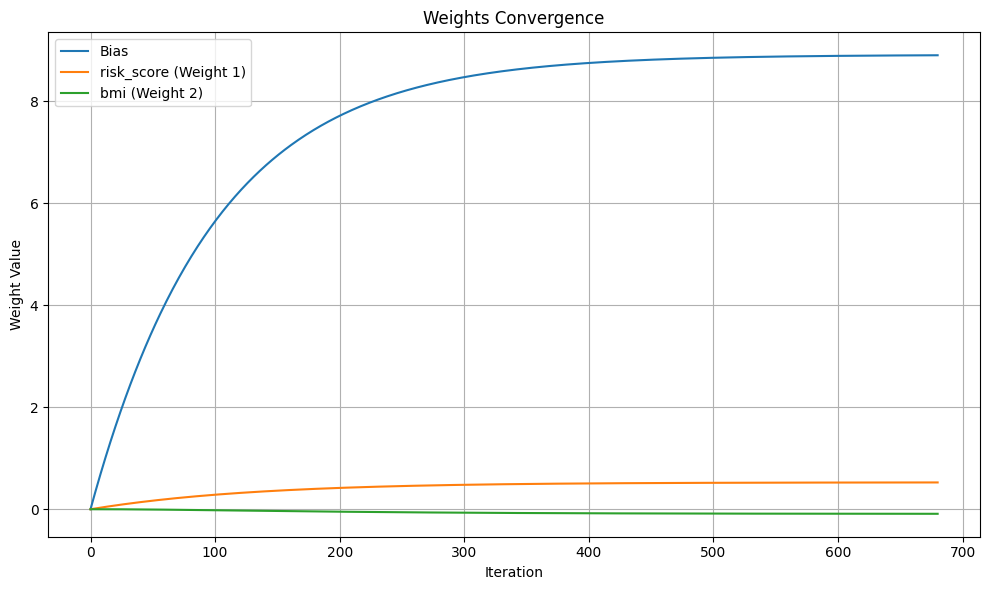

Mean Squared Error for Gradient descent: 0.3428676964611435
Predicted vs actual values for Gradient descent:


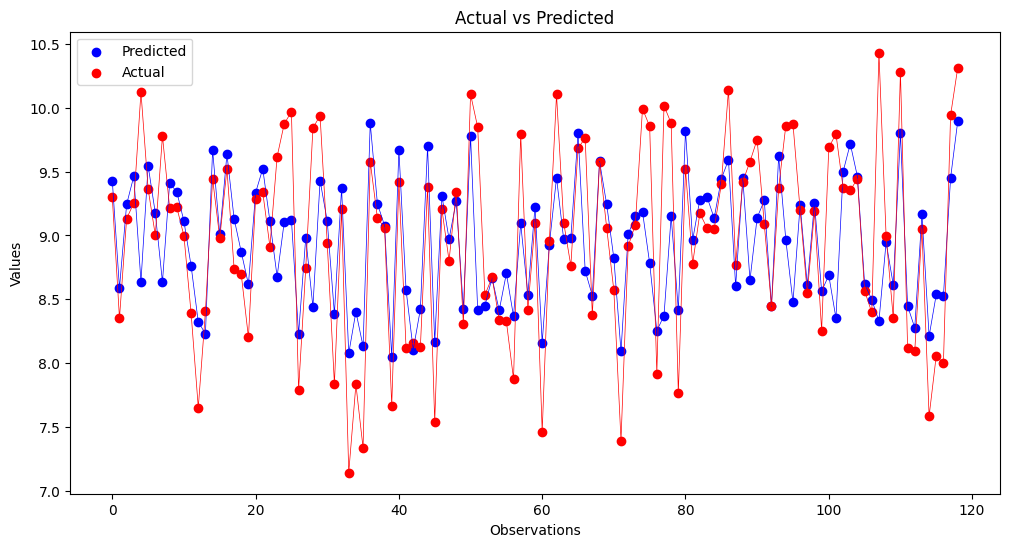

Coefficient of Determination for Gradient descent: 0.4374446972662671


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pre_process import preProcessor
from RegressionModel import SimpleRegressor
from data_gatherer import DataGatherer
from TestRegressionModel import TestRegressionModel

if __name__ == "__main__":
    df = pd.read_csv('E:\\NumericalMethods\\Project\\DataSet.csv')
    
    df_cleaned = DataGatherer.clean_data(df)
   
    measures_age = DataGatherer.compute_measures(df_cleaned, 'age')
    measures_bmi = DataGatherer.compute_measures(df_cleaned, 'bmi')
    measures_charges = DataGatherer.compute_measures(df_cleaned, 'charges')

    # Create a DataFrame to display the results
    results_table = pd.DataFrame({
        'Variable': ['Age', 'BMI', 'Charges'],
        'Mean': [measures_age['Mean'], measures_bmi['Mean'], measures_charges['Mean']],
        'Median': [measures_age['Median'], measures_bmi['Median'], measures_charges['Median']],
        'Variance': [measures_age['Variance'], measures_bmi['Variance'], measures_charges['Variance']],
        'Standard Deviation': [measures_age['Standard Deviation'], measures_bmi['Standard Deviation'], measures_charges['Standard Deviation']]
    })

    print(results_table)

    DataGatherer.histogram(df_cleaned)
    DataGatherer.box_plot(df_cleaned)

    # Display the table
    DataGatherer.scatter_plot(df_cleaned)

    df_copy = df_cleaned.copy()

    # Encode categorical variables
    preprocessor = preProcessor(df_cleaned)

    preprocessor.log_transform(df_cleaned)
    preprocessor.standardize(df_cleaned, 'bmi')
    preprocessor.create_composite_risk_score(df_cleaned)
    preprocessor.smoker_age_interaction(df_cleaned)
    preprocessor.family_size(df_cleaned)
    preprocessor.create_composite_bmi_age(df_cleaned)
    preprocessor.standardize(df_cleaned, 'risk_score')
    X_train, X_test, y_train, y_test = preprocessor.split_data(df_cleaned)

    DataGatherer.correlation_matrix(df_cleaned)
    preprocessor.plot_scatter(df_cleaned,'smoker_age_interaction','age','bmi','charges')
    
    #preprocessor.plot_3d_scatter(df_cleaned)

    simpleregressor = SimpleRegressor(X_train.values.tolist(), y_train.values.tolist())
    coefficients = simpleregressor.gradient_descent()

    print("Coefficients:", coefficients)
    simpleregressor.plot_contour()
    simpleregressor.plot_convergence()

    # Test the model

    test_model = TestRegressionModel(coefficients, X_test.values, y_test.values)
    mse = test_model.test_model(0)
    print("Mean Squared Error for Gradient descent:", mse)
    print("Predicted vs actual values for Gradient descent:")
    test_model.plot_pred_and_actual()

    coefficientOfDetermination = test_model.test_model(1)
    print("Coefficient of Determination for Gradient descent:", coefficientOfDetermination)
